In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
datasets_syn = ['cSBM_-1.0','cSBM_-0.75','cSBM_-0.5']
datasets_real = ['chameleon', 'squirrel', 'film', 'tolokers', 'genius', 'questions']

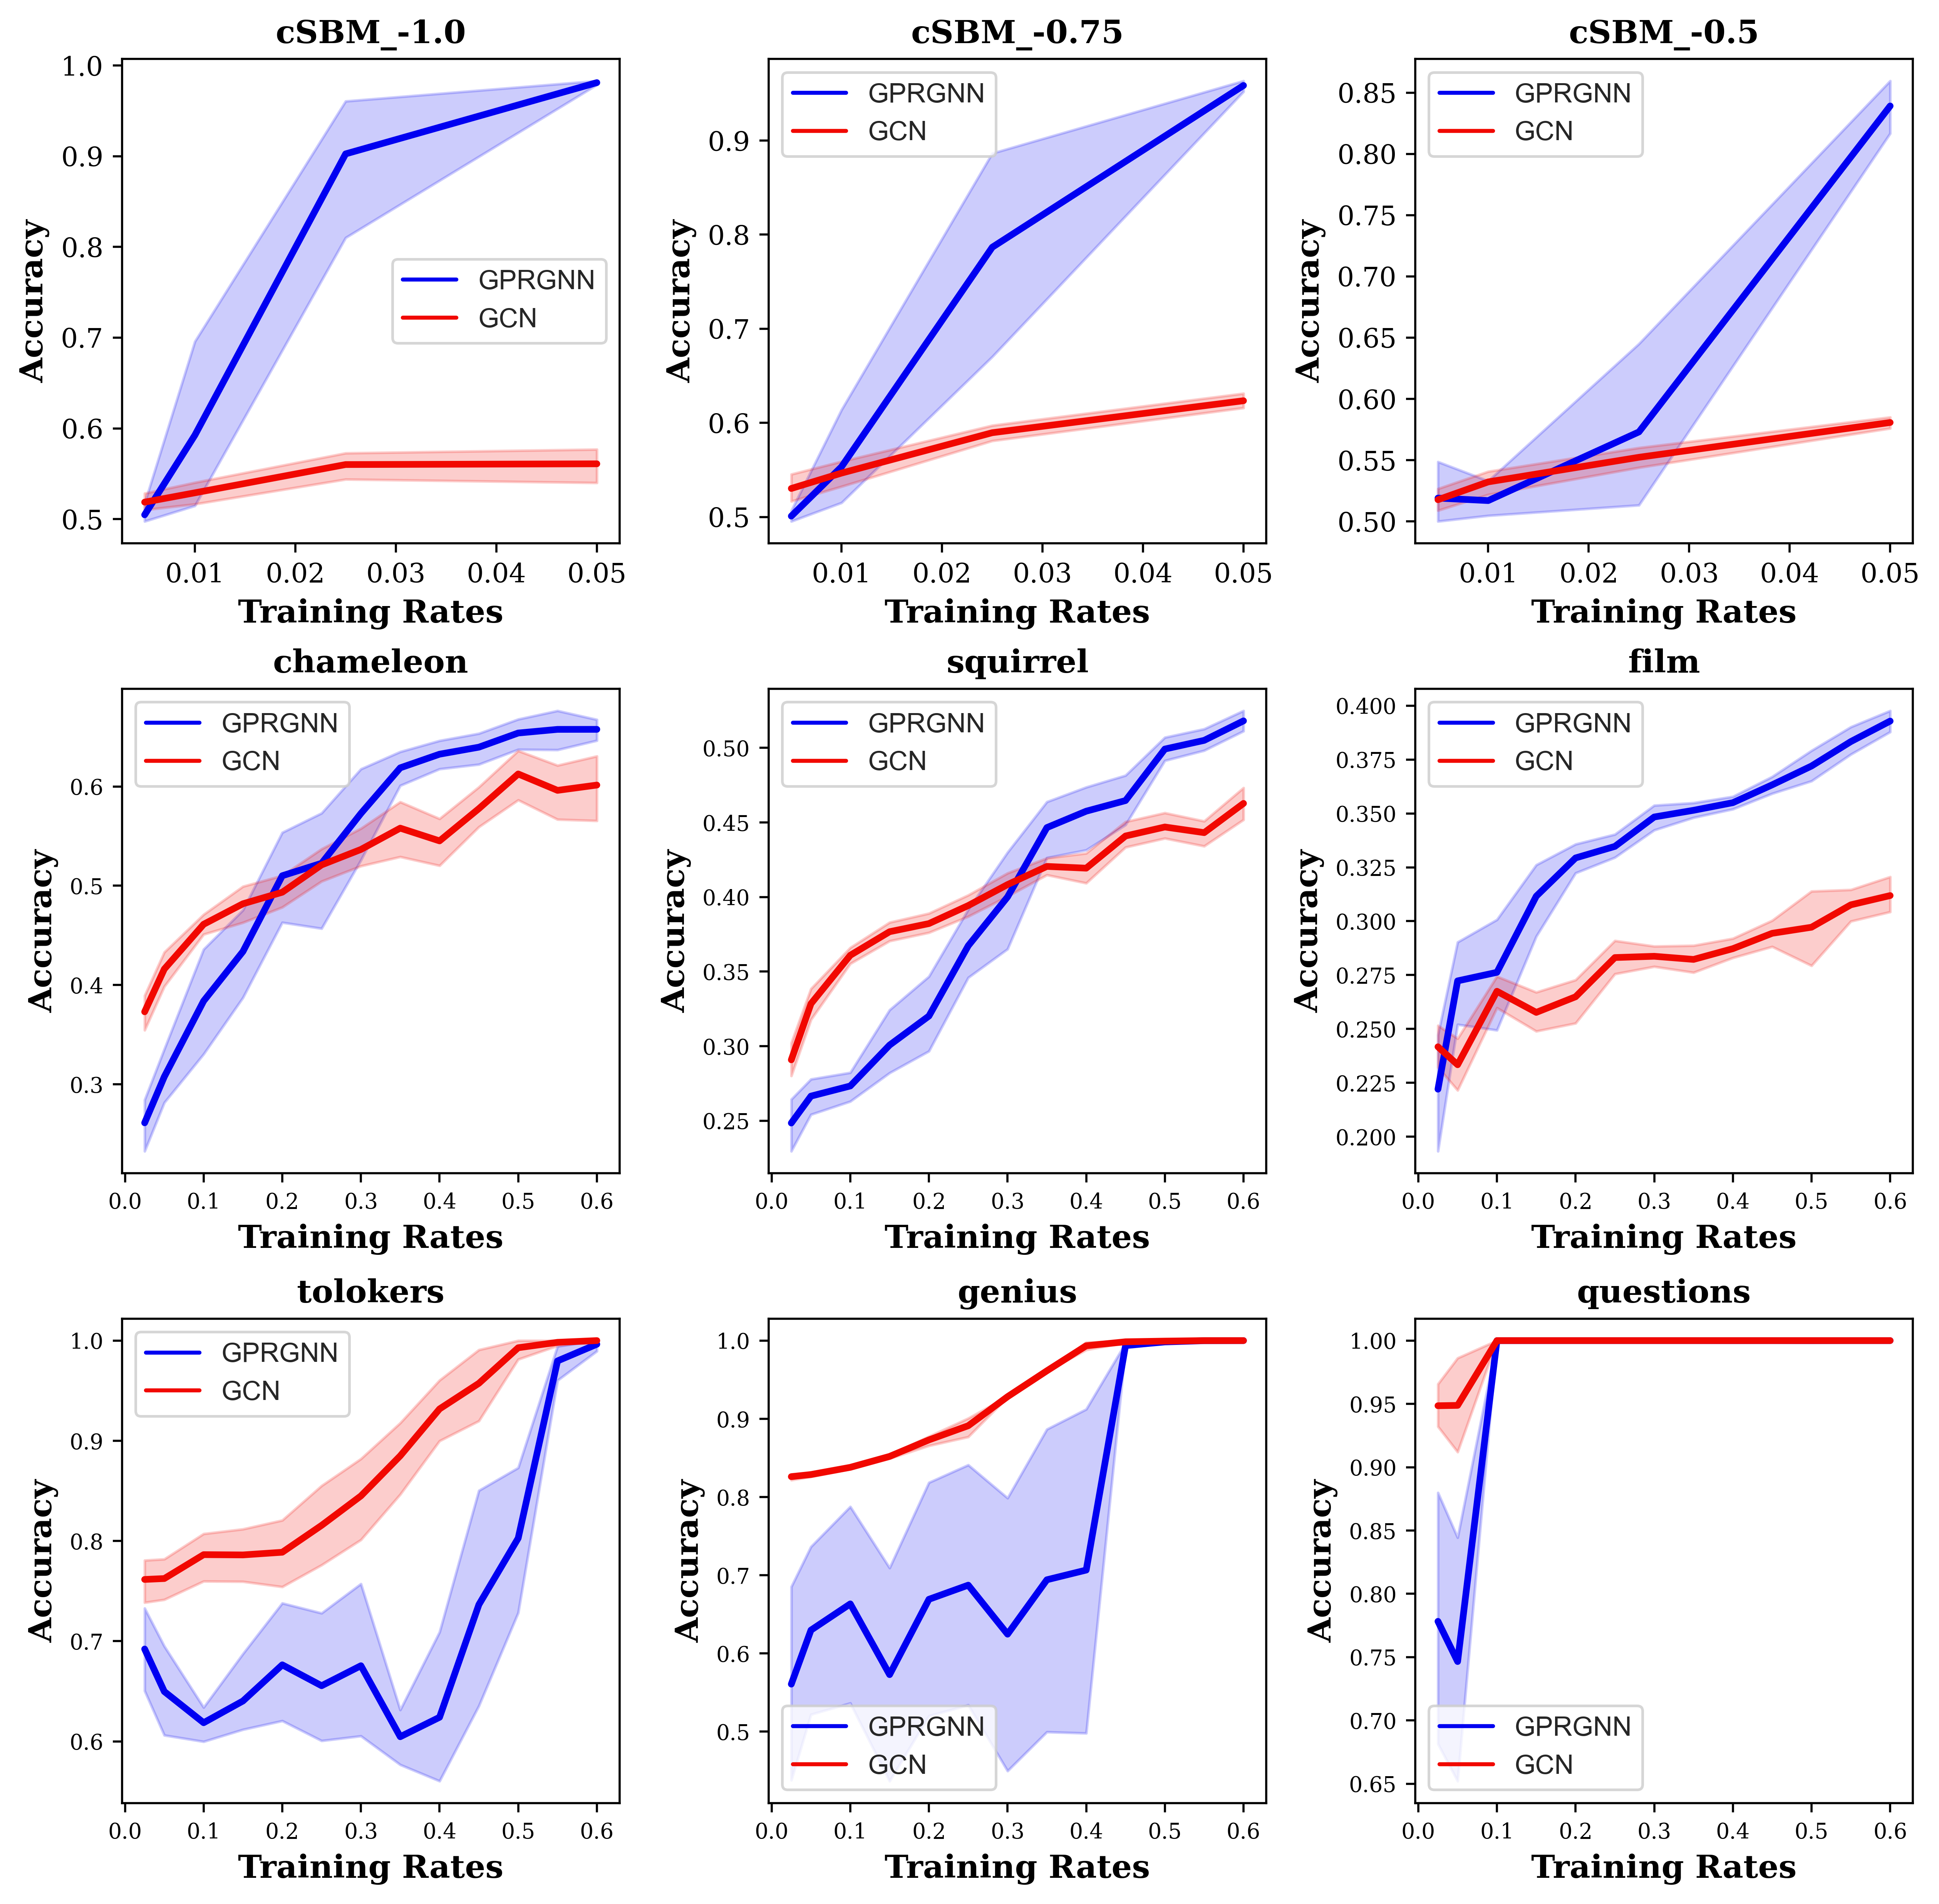

In [4]:
# Define custom color palette
# Define color map
cmap = plt.cm.jet
# Get colors from color map
colors = [cmap(i) for i in [0.1, 0.9]]


plt.rcParams['font.family'] = 'serif'
fig, ax = plt.subplots(3,3, figsize=(12, 12), dpi=500)
ax = ax.ravel()

for i, dataset in enumerate(datasets_syn):
    init = 'Random'
    # Define accuracy data
    train_rates = [0.005, 0.01, 0.025, 0.05]
    data_len = len(train_rates)
    model1_accuracies = []
    model2_accuracies = []
    model3_accuracies = []
    train_rate_list = []

    for train_rate in train_rates:
        model1_accuracies += (np.load(f'results/acc_10_{init}_{dataset}_{train_rate}_gprgnn.npy').tolist())
        model2_accuracies += (np.load(f'results/acc_{dataset}_{train_rate}_gcn.npy').tolist())
        train_rate_list += ([train_rate]*10)

    # Combine accuracies into a dataframe
    df = pd.DataFrame({
        'Accuracy': model1_accuracies + model2_accuracies,
        'Training Rates':  train_rate_list + train_rate_list,
        'Model': ['GPRGNN'] * data_len * 10  + ['GCN'] * data_len * 10
    })

    # Use seaborn to plot the accuracies
    sns.set(style='whitegrid')
    sns.lineplot(data=df, ax=ax[i], linewidth=2.5, x='Training Rates', y='Accuracy', hue='Model', palette=colors, ci=95)

    # Add axis labels and title
    ax[i].set_xlabel('Training Rates', fontsize=12, fontweight='bold')
    ax[i].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
    ax[i].set_title(f'{dataset}', fontsize=12, fontweight='bold')

    # Customize legend
    ax[i].legend(fontsize=10)

    # Adjust tick label font size
    ax[i].tick_params(axis='both', which='major', labelsize=10)


for i, dataset in enumerate(datasets_real):
    i = i + 3
    init = 'Random'
    # Define accuracy data
    train_rates = [0.025, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
    data_len = len(train_rates)
    model1_accuracies = []
    model2_accuracies = []
    model3_accuracies = []
    train_rate_list = []

    for train_rate in train_rates:
        model1_accuracies += (np.load(f'results/acc_10_{init}_{dataset}_{train_rate}_gprgnn.npy').tolist())
        model2_accuracies += (np.load(f'results/acc_{dataset}_{train_rate}_gcn.npy').tolist())
        train_rate_list += ([train_rate]*10)

    # Combine accuracies into a dataframe
    df = pd.DataFrame({
        'Accuracy': model1_accuracies + model2_accuracies,
        'Training Rates':  train_rate_list + train_rate_list,
        'Model': ['GPRGNN'] * data_len * 10  + ['GCN'] * data_len * 10
    })

    # Use seaborn to plot the accuracies
    sns.set(style='whitegrid')
    sns.lineplot(data=df, ax=ax[i], linewidth=2.5, x='Training Rates', y='Accuracy', hue='Model', palette=colors, ci=95)

    # Add axis labels and title
    ax[i].set_xlabel('Training Rates', fontsize=12, fontweight='bold')
    ax[i].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
    ax[i].set_title(f'{dataset}', fontsize=12, fontweight='bold')

    # Customize legend
    ax[i].legend(fontsize=10)

    # Adjust tick label font size
    ax[i].tick_params(axis='both', which='major', labelsize=8)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()
fig.tight_layout()
# fig.savefig('GPRGNN-R.pdf', dpi=500)


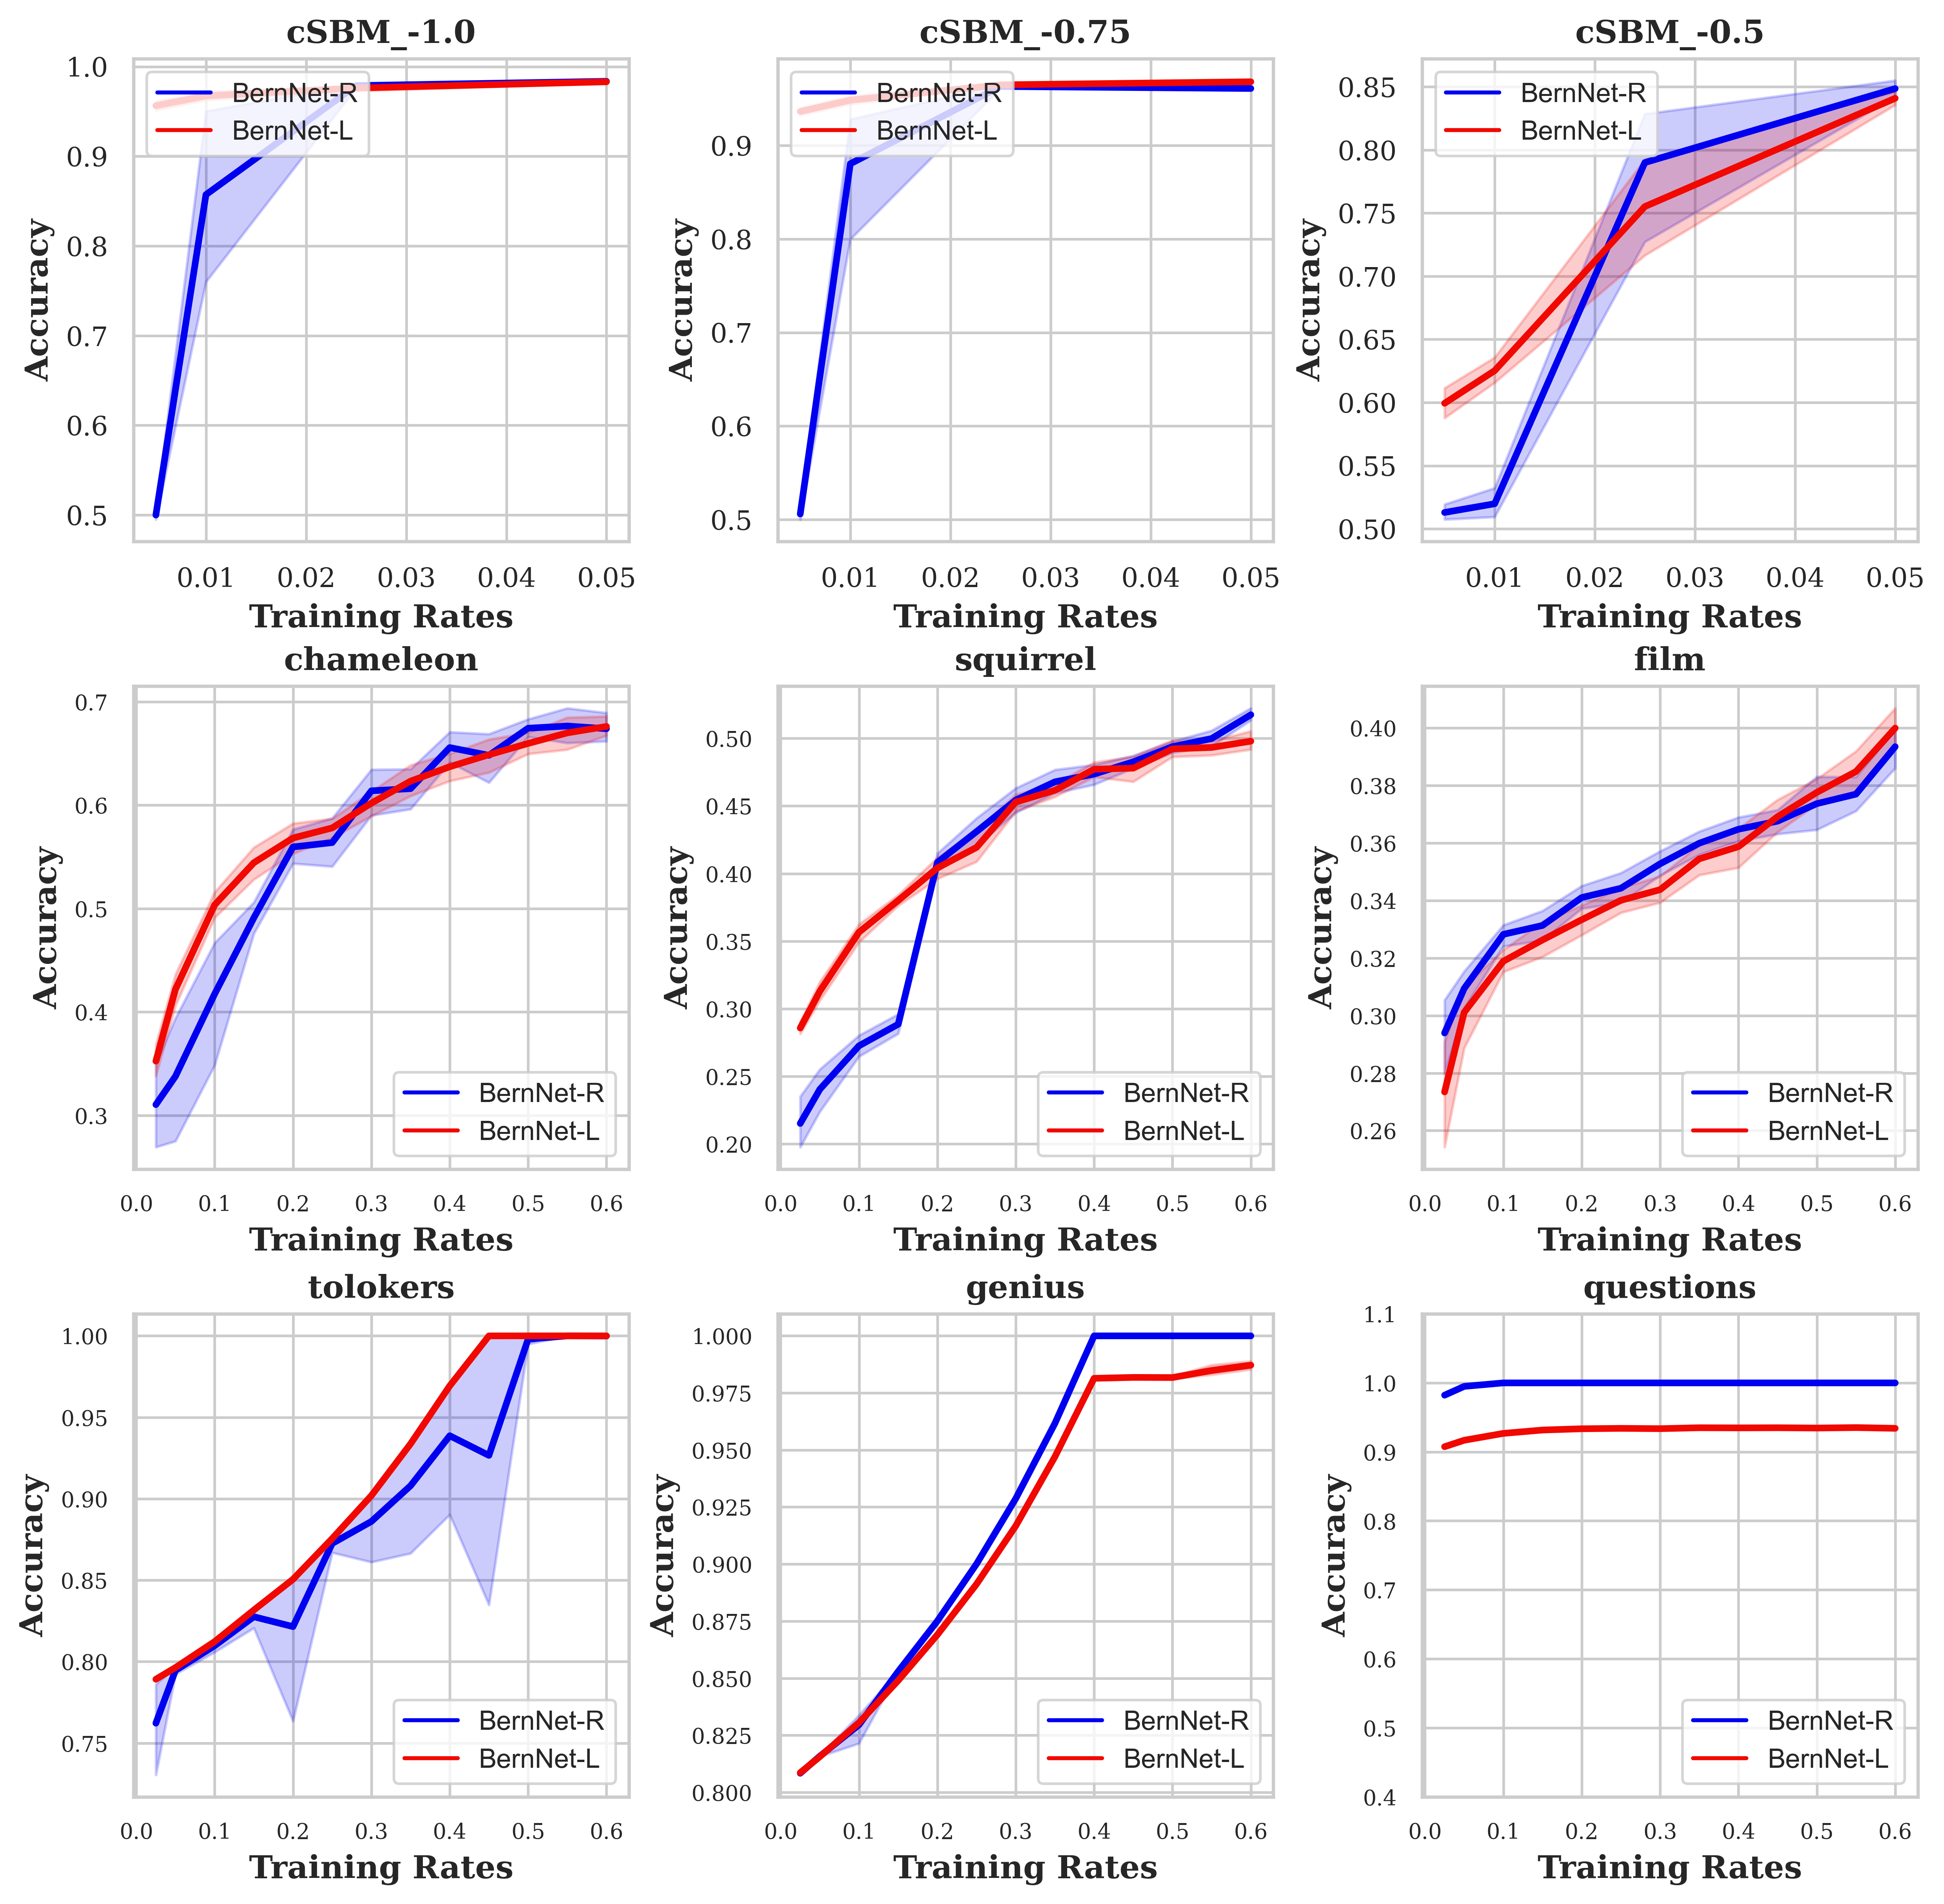

In [5]:
# Define custom color palette
# Define color map
cmap = plt.cm.jet
# Get colors from color map
colors = [cmap(i) for i in [0.1, 0.9]]


plt.rcParams['font.family'] = 'serif'
fig, ax = plt.subplots(3,3, figsize=(12, 12), dpi=500)
ax = ax.ravel()

for i, dataset in enumerate(datasets_syn):
    # Define accuracy data
    train_rates = [0.005, 0.01, 0.025, 0.05]
    data_len = len(train_rates)
    model1_accuracies = []
    model2_accuracies = []
    model3_accuracies = []
    train_rate_list = []

    for train_rate in train_rates:
        model2_accuracies += (np.load(f'results/acc_10_Random_{dataset}_{train_rate}_bernnet.npy').tolist())
        model3_accuracies += (np.load(f'results/acc_10_WS_{dataset}_{train_rate}_bernnet.npy').tolist())
        train_rate_list += ([train_rate]*10)

    # Combine accuracies into a dataframe
    df = pd.DataFrame({
        'Accuracy':  model2_accuracies + model3_accuracies,
        'Training Rates':  train_rate_list + train_rate_list,
        'Model': ['BernNet-R'] * data_len * 10 + ['BernNet-L'] * data_len * 10
    })

    # Use seaborn to plot the accuracies
    sns.set(style='whitegrid')
    sns.lineplot(data=df, ax=ax[i], linewidth=2.5, x='Training Rates', y='Accuracy', hue='Model', palette=colors, ci=95)

    # Add axis labels and title
    ax[i].set_xlabel('Training Rates', fontsize=12, fontweight='bold')
    ax[i].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
    ax[i].set_title(f'{dataset}', fontsize=12, fontweight='bold')

    # Customize legend
    ax[i].legend(fontsize=10, loc='upper left')

    # Adjust tick label font size
    ax[i].tick_params(axis='both', which='major', labelsize=10)

for i, dataset in enumerate(datasets_real):
    i = i + 3
    # Define accuracy data
    train_rates = [0.025, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
    data_len = len(train_rates)
    model1_accuracies = []
    model2_accuracies = []
    model3_accuracies = []
    train_rate_list = []

    for train_rate in train_rates:
        model2_accuracies += (np.load(f'results/acc_10_Random_{dataset}_{train_rate}_bernnet.npy').tolist())
        model3_accuracies += (np.load(f'results/acc_10_WS_{dataset}_{train_rate}_bernnet.npy').tolist())
        train_rate_list += ([train_rate]*10)

    # Combine accuracies into a dataframe
    df = pd.DataFrame({
        'Accuracy': model2_accuracies + model3_accuracies,
        'Training Rates':  train_rate_list + train_rate_list,
        'Model': ['BernNet-R'] * data_len * 10 + ['BernNet-L'] * data_len * 10
    })

    # Use seaborn to plot the accuracies
    sns.set(style='whitegrid')
    sns.lineplot(data=df, ax=ax[i], linewidth=2.5, x='Training Rates', y='Accuracy', hue='Model', palette=colors, ci=95)
    
    if i == 8:
        ax[i].set_ylim(0.4, 1.1)   
    # Add axis labels and title
    ax[i].set_xlabel('Training Rates', fontsize=12, fontweight='bold')
    ax[i].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
    ax[i].set_title(f'{dataset}', fontsize=12, fontweight='bold')

    # Customize legend
    ax[i].legend(fontsize=10, loc='lower right')

    # Adjust tick label font size
    ax[i].tick_params(axis='both', which='major', labelsize=8)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()
fig.tight_layout()
# fig.savefig('BernNet.pdf', dpi=500)
